## **Word Embeddings from Co-occurrence Matrices**

This notebook demonstrates how to generate word embeddings using co-occurrence matrices and Truncated SVD. We'll execute the main pipeline from `main.py` and explain each step.

### **Step 1: Setup**
First, we import the necessary modules and make the functions in `main.py` accessible. We also ensure that our working directory is set up correctly.

In [1]:
# Import required modules
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

# Ensure the main.py directory is in the path
sys.path.append(os.path.abspath('../src'))

# Import the main script
from src.main import compute_co_occurrence_matrix, distinct_words, plot_embeddings, reduce_to_k_dim
from src.utils import read_corpus

print('Libraries imported!')

Libraries imported!


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/enricozanetti/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


### **Step 2: Loading the Corpus**

We load the Reuters corpus using the `read_corpus` function from the `utils` module. This corpus is a collection of documents where each document is represented as a list of words.

In [2]:
# Load the tokenized Reuters corpus as a list of documents
corpus = read_corpus()

# Get the sorted list of distinct words and the total count
corpus_words, num_distinct_words = distinct_words(corpus)

# Print summary information about the corpus
print(f'Number of documents in the corpus: {len(corpus)}')
print(f'Number of distinct words: {num_distinct_words}')
print(f'Sample document: {corpus[0]}')

Number of documents in the corpus: 578
Number of distinct words: 8185
Sample document: ['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the', 'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise', 'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to', 'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry', 'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for', 'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres', '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows', 'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following', 'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic', 'electric', 'power', 'demand', '.', 'miti', 'is', 

### **Step 3: Computing the Co-occurrence Matrix**

A co-occurrence matrix captures how often words appear near each other within a specified context window.

Each entry `(i, j)` in the matrix represents the frequency of word `j` appearing in the context of word `i`.

- **Window size**: The number of words on either side of a target word to consider as context.
- **Function used**: `compute_co_occurrence_matrix`.

Let’s compute the co-occurrence matrix for the corpus.

In [3]:
# Compute the co-occurrence matrix
window_size = 4
co_occurrence_matrix, word2ind = compute_co_occurrence_matrix(corpus, window_size)

# Display the size of the matrix and a snippet of its contents
print(f'Co-occurrence matrix shape: {co_occurrence_matrix.shape}')
print(f'Sample words and their indices: {list(word2ind.items())[:10]}')

Co-occurrence matrix shape: (8185, 8185)
Sample words and their indices: [('"', 0), ('"(', 1), ('",', 2), ('"...', 3), ('$', 4), ('&', 5), ("'", 6), ('(', 7), (')', 8), (')"', 9)]


### **Step 4: Reducing Dimensionality with Truncated SVD**

Co-occurrence matrices are usually high-dimensional and sparse, making them challenging to work with. To address this, we use **Truncated SVD** to reduce the dimensionality of the matrix to a smaller number of dimensions (`k`).

- **Function used**: `reduce_to_k_dim`.
- **Purpose**: Generate low-dimensional word embeddings that capture semantic relationships between words.

In [4]:
# Reduce the dimensionality of the co-occurrence matrix
k = 2
reduced_matrix = reduce_to_k_dim(co_occurrence_matrix, k)

# Display the reduced matrix
print(f'Reduced matrix shape: {reduced_matrix.shape}')

Reduced matrix shape: (8185, 2)


### **Step 5: Normalizing Word Embeddings**

To ensure uniformity and simplify comparisons, we normalize the rows of the reduced matrix so that each row (representing a word embedding) has a unit length.

In [5]:
# Normalize the rows of the reduced matrix
row_norms = np.linalg.norm(reduced_matrix, axis=1, keepdims=True)
normalized_embeddings = reduced_matrix / row_norms

# Display the normalized embeddings for the first few words
print('Sample normalized embeddings:')
for word, idx in list(word2ind.items())[:5]:
    print(f'{word}: {normalized_embeddings[idx]}')

Sample normalized embeddings:
": [ 0.98750922 -0.15756123]
"(: [ 0.99184344 -0.12746215]
",: [0.97435474 0.22501741]
"...: [ 0.93020354 -0.3670441 ]
$: [ 0.85823949 -0.51324943]


### **Step 6: Visualizing Word Embeddings**

We visualize the word embeddings for a selected set of words in a 2D space. This visualization helps us understand how semantically related words are positioned close to each other.

- **Function used**: A helper function within `main.py` (`plot_embeddings`).
- **Words to visualize**: `['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']`.

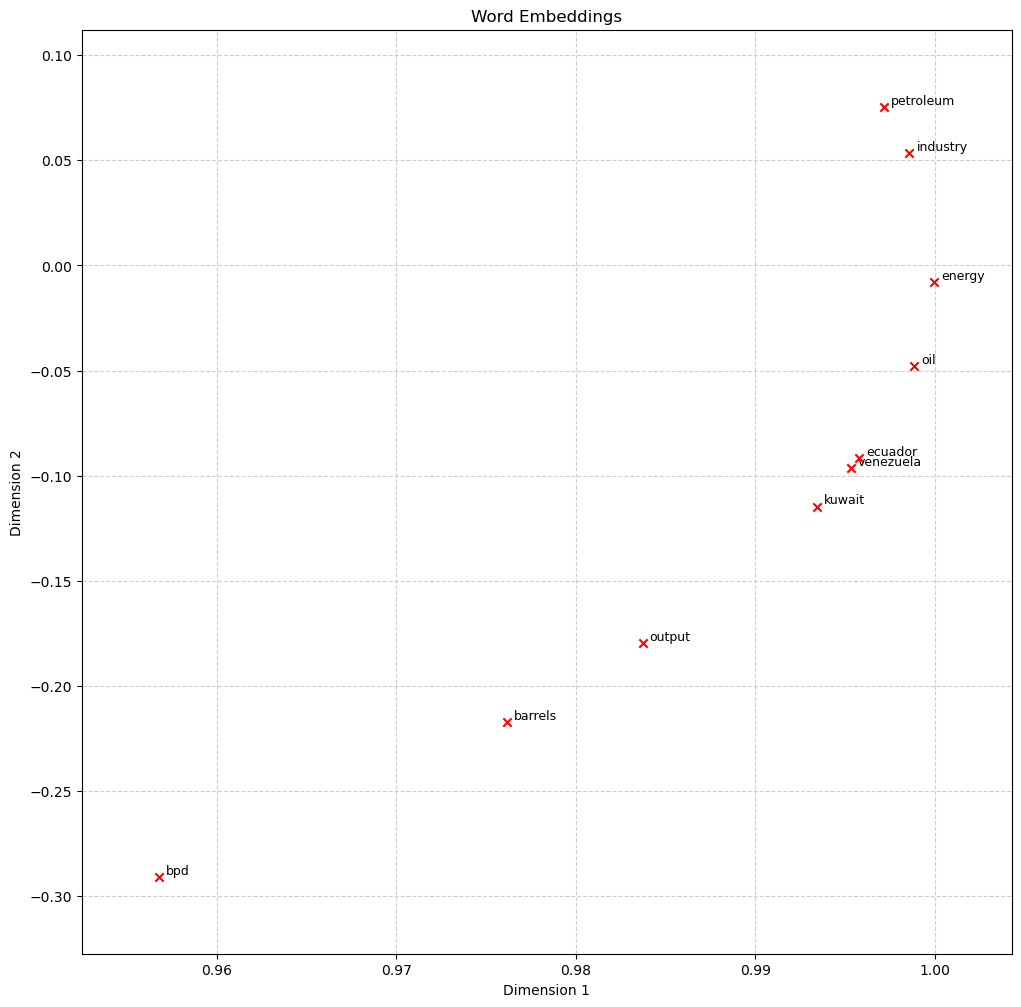

In [6]:
# Define the words to visualize
words_to_visualize = [
    'barrels',
    'bpd',
    'ecuador',
    'energy',
    'industry',
    'kuwait',
    'oil',
    'output',
    'petroleum',
    'venezuela',
]

# Plot the embeddings
plot_embeddings(normalized_embeddings, word2ind, words_to_visualize, '2D Word Embeddings')


### **Conclusion**

In this notebook, we demonstrated how to generate and visualize word embeddings using:

1. A **co-occurrence matrix** to capture word relationships in a corpus.
2. **Truncated SVD** to reduce the dimensionality of the co-occurrence matrix.
3. **Normalization** to standardize the word embeddings.
4. **Visualization** to understand semantic relationships in the embeddings.

These embeddings can be further used for tasks like similarity measurement, clustering, or as input to machine learning models.